# 240970107
Vikith B Kotian


In [ ]:
# EXERCISE 1:
# Data Analysis using mtcars

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Materials/mtcars.csv") 

In [6]:
#1. Find the car with the best mpg
best_mpg = df[df['mpg'] == df['mpg'].max()]
print(best_mpg)

             model   mpg  cyl  disp  hp  drat     wt  qsec  vs  am  gear  carb
19  Toyota Corolla  33.9    4  71.1  65  4.22  1.835  19.9   1   1     4     1


In [7]:
#2. Find the car with the worst mpg
worst_mpg = df[df['mpg'] == df['mpg'].min()]
print(worst_mpg)

                  model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   

    gear  carb  
14     3     4  
15     3     4  


In [8]:
#3. Find the car with the best horsepower 
best_hp = df[df['hp'] == df['hp'].max()]
print(best_hp)

            model   mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  carb
30  Maserati Bora  15.0    8  301.0  335  3.54  3.57  14.6   0   1     5     8


In [9]:
#4. Find 5 number summary of displacement
df['disp'].describe()[['min', '25%', '50%', '75%', 'max']]

min     71.100
25%    120.825
50%    196.300
75%    326.000
max    472.000
Name: disp, dtype: float64

In [10]:
#5. Find median horse power
print("Median: ",df['hp'].median())

Median:  123.0


In [11]:
#6. What is average mpg for manual vs. automatic cars 
df['am'] = df['am'].map({0: 'Automatic', 1: 'Manual'})
df.groupby('am')['mpg'].mean()

am
Automatic    17.147368
Manual       24.392308
Name: mpg, dtype: float64

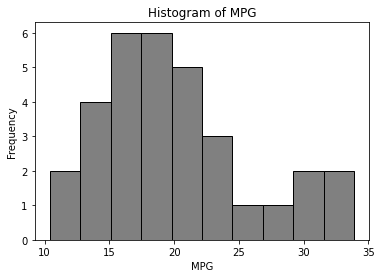

In [12]:
#7. Draw a histogram of miles per gallon 
plt.hist(df['mpg'], bins=10, color='grey', edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

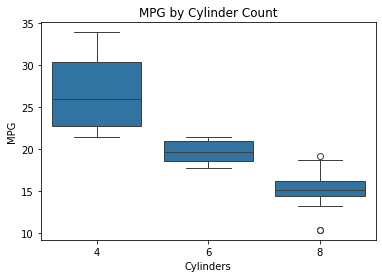

In [13]:
#8. Boxplot of mpg for each cylinder type 
sns.boxplot(x='cyl', y='mpg', data=df)
plt.title('MPG by Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

In [14]:
#9. Create a crosstab displaying count of automatic vs. manual cars
pd.crosstab(df['am'], columns='count')

col_0,count
am,
Automatic,19
Manual,13


In [15]:
#10. Create a crosstab displaying count of “am vs cyl”
pd.crosstab(df['am'], df['cyl'])

cyl,4,6,8
am,,,
Automatic,3,4,12
Manual,8,3,2


In [16]:
#11. What is the correlation between the weight of the car and mpg 
correlation = df['wt'].corr(df['mpg'])
print("Correlation between weight of the car and mpg:", correlation)

Correlation between weight of the car and mpg: -0.8676593765172279


# EXERCISE 2: 

In [17]:
#Descriptive Analytics and Visualization 

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Materials/bollywood.csv')

In [8]:
#1. How many records are present in the dataset?  
print("Number of records: ",df.shape[0])

Number of records:  149


In [9]:
#2. How many movies got released in each genre? Sort number of releases in each genre in descending order. 
df['Genre'].value_counts()

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [10]:
#3. Which genre had highest number of releases?  
df['Genre'].value_counts().idxmax()

'Comedy'

In [11]:
#4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
pd.crosstab(df['Genre'], df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [13]:
#5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.) 
# Convert Release Date column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y')

# Extract month
df['Month'] = df['Release Date'].dt.month

# Count number of releases per month
month_counts = df['Month'].value_counts().sort_values(ascending=False)

print("Movie releases per month:\n", month_counts)
print("\nMonth with maximum releases:", month_counts.idxmax(), "with", month_counts.max(), "movies")


Movie releases per month:
 Month
1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64

Month with maximum releases: 1 with 20 movies


In [14]:
#6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?
high_budget = df[df['Budget'] >= 25]
high_budget['Month'].value_counts().sort_values(ascending=False)

Month
2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: count, dtype: int64

In [15]:
#7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [16]:
#8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times. 
df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [17]:
#9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative? 
corr = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation:", corr)

Correlation: 0.6825165877731297


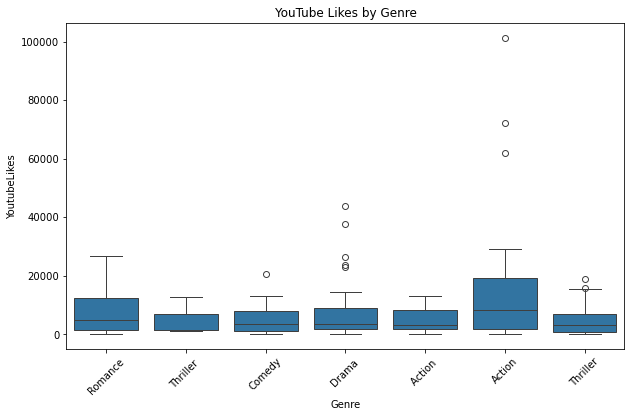

In [18]:
#10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.xticks(rotation=45)
plt.title('YouTube Likes by Genre')
plt.show()

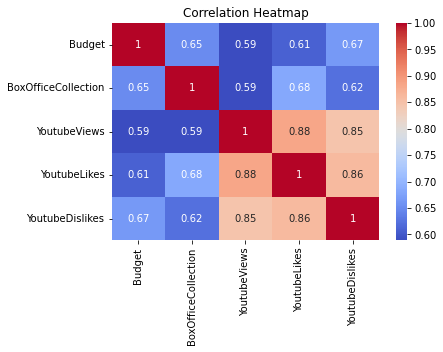

In [19]:
#11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap. 
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

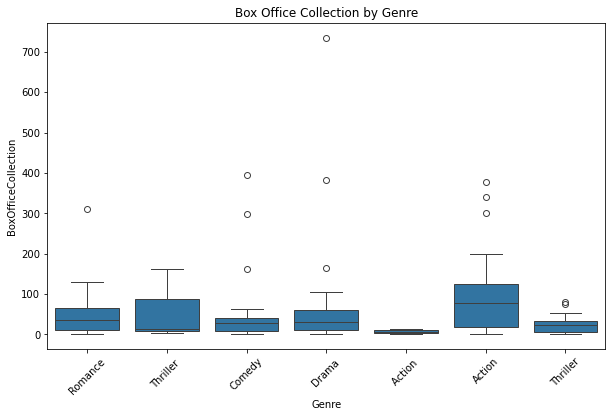

In [23]:
#12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='BoxOfficeCollection', data=df)
plt.xticks(rotation=45)
plt.title('Box Office Collection by Genre')
plt.show()

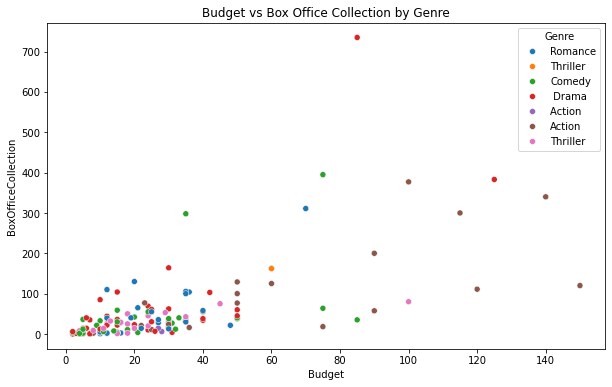

In [24]:
#13. Visualize  the Budget and Box office collection based on Genre. 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=df)
plt.title('Budget vs Box Office Collection by Genre')
plt.show()


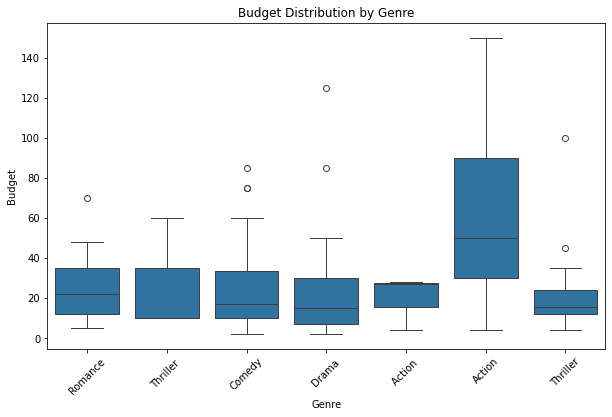

In [25]:
#14. Find the distribution of movie budget for every Genre. 
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='Budget', data=df)
plt.xticks(rotation=45)
plt.title('Budget Distribution by Genre')
plt.show()


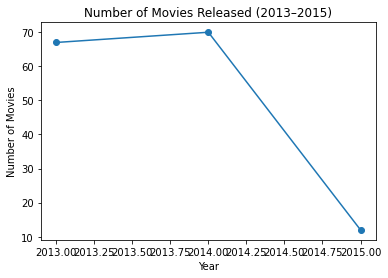

In [26]:
#15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Year'] = df['Release Date'].dt.year
year_counts = df['Year'].value_counts().sort_index()

plt.plot(year_counts.index.to_numpy(), year_counts.values, marker='o')
plt.title('Number of Movies Released (2013–2015)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()